In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
        'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
        'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
        'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline',
        'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine',
        'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane',
        'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate',
        'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene',
        'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

datajhsoa["SOA"] = 0
datajh["SOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.30um"))]:
    datajhsoa["SOA"] = datajhsoa["SOA"] + datajhsoa[i]
    datajh["SOA"] = datajh["SOA"] + datajh[i]
datajhsoa["CSOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.30um"))]:
    datajhsoa["CSOA"] = datajhsoa["CSOA"] + datajhsoa[i]
datacmsoa["SOA"] = 0
datacm["SOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.30um"))]:
    datacmsoa["SOA"] = datacmsoa["SOA"] + datacmsoa[i]
    datacm["SOA"] = datacm["SOA"] + datacm[i]
datacmsoa["CSOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.30um"))]:
    datacmsoa["CSOA"] = datacmsoa["CSOA"] + datacmsoa[i]
datajh['place'] = 'JH'
datacm['place'] = 'CM'
dataall = pd.concat([datajh, datacm], axis=0)
dataall.columns = ['Time', 'TVOCs', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
                   'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
                   'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
                   'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene',
                   'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane',
                   'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
                   '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol',
                   'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol',
                   'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane',
                   'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um',
                   '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
                   '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um',
                   '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
                   'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons',
                   'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
                   'Day', 'Datetime', 'seconds', 'SOA', 'place']


In [4]:
from palettable.tableau import Tableau_20
# 需要统计分析的变量
variables = ['SOA', 'Isoprene', 'NOx', 'O3', 'SO2', 'Radiation', 'Temperature', 'Humidity']
units = {'SOA': 'μg/m³', 'Isoprene': 'μg/m³', 'NOx': 'ppb', 'O3': 'ppb', 'SO2': 'ppb', 
         'Radiation': 'W/m²', 'Temperature': '°C', 'Humidity': '%'}


In [5]:
# 去除极端值函数，基于 IQR（四分位距）
def remove_outliers(df, variable):
    return df

# 去除极端值
filtered_data = dataall.copy()
for var in variables:
    filtered_data = filtered_data.groupby('place').apply(lambda x: remove_outliers(x, var)).reset_index(drop=True)

# 进行描述性统计，仅保留均值、标准差、最大值和最小值
stats = filtered_data.groupby('place')[variables].agg(['mean', 'std', 'max', 'min']).reset_index()

# 创建一个新的 DataFrame，将变量名称和单位合并到一列，设置双重索引
rows = []
for var in variables:
    for place, group in stats.groupby('place'):
        row = {
            'Variable (Unit)': f"{var} ({units[var]})",  # 合并变量名称和单位
            'Place': place,
            'Mean': group[(var, 'mean')].values[0],
            'Std': group[(var, 'std')].values[0],
            'Max': group[(var, 'max')].values[0],
            'Min': group[(var, 'min')].values[0]
        }
        rows.append(row)

# 转换为 DataFrame 并设置索引
descriptive_stats_df = pd.DataFrame(rows)
descriptive_stats_df.set_index(['Variable (Unit)', 'Place'], inplace=True)
descriptive_stats_df.to_csv('变量描述性统计.csv', encoding='utf-8-sig')

C:\Users\aa271\AppData\Local\Temp\ipykernel_26056\1281518597.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = filtered_data.groupby('place').apply(lambda x: remove_outliers(x, var)).reset_index(drop=True)
C:\Users\aa271\AppData\Local\Temp\ipykernel_26056\1281518597.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = filtered_data.groupby('place').apply(lambda x: remove_out

PermissionError: [Errno 13] Permission denied: '变量描述性统计.csv'

In [6]:
descriptive_stats_df

Mean        Std         Max        Min
Variable (Unit)  Place                                             
SOA (μg/m³)      CM      2.829768   1.225145    6.550000   0.720000
                 JH      2.338204   1.435748    5.760000   0.350000
Isoprene (μg/m³) CM      1.350947   2.081850    7.500000   0.000000
                 JH      0.505052   1.111284    5.000000   0.000000
NOx (ppb)        CM      6.022502   3.135628   15.702500   1.031000
                 JH      5.541138   4.349754   22.435556  -0.463000
O3 (ppb)         CM     19.133081  16.017395   64.503333   0.607000
                 JH     14.552130  13.296889   51.580000  -3.320625
SO2 (ppb)        CM      3.153765   2.971395    8.780000   0.000000
                 JH      4.853038   0.839170    6.495000   2.396500
Radiation (W/m²) CM      0.939065   1.392902    5.296222  -0.595000
                 JH     19.842384  24.722899  102.622222  -5.300000
Temperature (°C) CM     31.535963   4.028041   40.340000  23.740000
                 JH     28.816709   2.062938   34.666667  24.200000
Humidity (%)     CM     84.264739  13.236110   98.200010  51.525556
                 JH     77.160884  10.925226   95.400000  50.790000

In [6]:
import os
# 创建保存图像的文件夹
os.makedirs('变量分布概览', exist_ok=True)

# 计算每个变量在不同地点的均值和标准差，并将范围设置为均值正负三倍标准差
range_limits = {}
for var in variables:
    range_limits[var] = {}
    for place in ['JH', 'CM']:
        mean_val = filtered_data[filtered_data['place'] == place][var].mean()
        std_val = filtered_data[filtered_data['place'] == place][var].std()
        range_limits[var][place] = (mean_val - 3 * std_val, mean_val + 3 * std_val)

# 绘制并保存核密度估计图，按地点分别绘制一张图
for i, var in enumerate(variables):
    for place in ['JH', 'CM']:
        plt.figure(figsize=(4, 4/4))
        
        # 绘制该地点的核密度估计图
        sns.kdeplot(data=filtered_data[filtered_data['place'] == place], x=var, fill=True, 
                    color=Tableau_20.mpl_colors[i % len(Tableau_20.mpl_colors)], alpha=0.9)
        
        # 设置 x 轴标签和刻度
        plt.xlabel(f'', fontsize=12, fontweight='bold')
        plt.ylabel('')  # 不显示 y 轴
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks([])  # 去掉 y 轴刻度
        plt.grid(False)  # 去掉网格
        
        
        plt.xlim(range_limits[var][place])
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))  # 设置 x 轴刻度为 8 个
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # 保留两位小数
        plt.gca().spines['top'].set_visible(False)    # 去掉顶部边框
        plt.gca().spines['right'].set_visible(False)  # 去掉右侧边框
        plt.gca().spines['left'].set_visible(False)   # 去掉左侧边框
        
        # 保存图像，以“变量+地点”的格式命名
        plt.savefig(f'变量分布概览/{var}_{place}_density_plot.png', dpi=500,bbox_inches='tight')
        plt.close()

In [4]:
from scipy.stats import norm, expon, gamma, lognorm, beta, kstest, shapiro
def normal_distribution_fit_and_test(grouped_by_hour):
    normality_results = {}
    for hour, group in grouped_by_hour:
        # Fit normal distribution and get parameters
        params = norm.fit(group)
        # Perform Shapiro-Wilk test
        _, p_value = shapiro(group)
        # Check if data is normally distributed based on p-value
        is_normal = True if p_value > 0.05 else False
        normality_results[hour] = (
        params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

    normality_df = pd.DataFrame(normality_results).T
    normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
    normality_df.reset_index(inplace=True)
    normality_df.rename(columns={'index': 'Hour'}, inplace=True)

    return normality_df

In [5]:
from scipy.optimize import curve_fit


# 定义与均值 Mean 的关系的函数
def mean_relation(T, Q0, a, v0):
    return Q0 + (a * T ** 2) / 2 + T * v0


# 定义与方差 variance 的关系的函数
def std_dev_relation(T, k, sigma0):
    return ((k ** 2) * (T ** 3)) / 3 + k * (T ** 2) * sigma0 + T * (sigma0 ** 2)


from scipy.stats import zscore
from scipy.stats import t


# 定义去除离群值的函数（使用 Z-score 方法）
def remove_outliers(data):
    z_scores = zscore(data)
    return data[(np.abs(z_scores) < 3)]  # 通常使用 3 作为 Z-score 的阈值


def clean_data(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df.reset_index(drop=True)

In [6]:
import re
def scientific_notation_with_superscript(value, precision=3):
    # 如果值为零，直接返回零字符串格式
    if value == 0:
        return f"{value:.{precision}f}"
    
    # 格式化为科学记数法，并去掉指数部分的前导零
    formatted_value = f"{value:.{precision}e}"
    formatted_value = formatted_value.replace('e+', 'x10^').replace('e-', 'x10^-')
    formatted_value = re.sub(r'x10\^([-+]?)0*(\d+)', r'x10^\1\2', formatted_value)  # 保留负号
    
    # 将指数部分的数字替换为 Unicode 上标
    superscript_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    match = re.search(r'x10\^([-+]?\d+)', formatted_value)
    if match:
        exponent = match.group(1).translate(superscript_map)
        formatted_value = re.sub(r'x10\^[-+]?\d+', f'x10{exponent}', formatted_value)
         # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')
    else:
        # 如果没有 x10^，直接返回数值部分
        formatted_value = formatted_value.split('x10')[0]
         # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')
        
    return formatted_value


In [7]:
def analyze_isoprene(data):
    datare = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare.O3,
        "NOx": datare.NOx,
        "SO2": datare.SO2,
        "SOA": datare.SOA,
        "K": 1,
        'Isoprene':datare["Isoprene"]
    })
    
    # 计算交互变量
    dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
    dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
    dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
    dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
    dataj["O3hv"] = dataj["O3"] * dataj["hv"]
    
    

    results = []  # 存储结果

    # 模型 1：直接使用观测到的 Isoprene 浓度
    dataj["BVOCs"] = datare["Isoprene"]
    variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]
    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene"]

    X1 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    Y1 = dataj["SOA"]
    model1 = sm.WLS(Y1, X1).fit(cov_type='HC3')

    # 模型 2：使用温度拟合 Isoprene 的均值和方差，再以方差为权重拟合 SOA
    
    
    data_grouped = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    data_grouped["Concentration"] = data_grouped["Isoprene"]
    grouped_by_hour = data_grouped.groupby('Hour')
    normality_df = normal_distribution_fit_and_test(grouped_by_hour["Isoprene"])
    normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]
    # 提取数据
    T = normality_df['T'].values
    mean_values = normality_df['Mean'].astype("float").values
    std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2
    # 去除离群值
    mean_values_filtered = remove_outliers(mean_values)
    std_dev_values_filtered = remove_outliers(std_dev_values)
    T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
    T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]
    # 拟合模型
    params_mean, covariance_mean = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf',
                                             maxfev=10000)
    params_std_dev_filtered, covariance_std_dev = curve_fit(std_dev_relation, T_filtered_std_dev,
                                                            std_dev_values_filtered, method='trf')
    

    mean_isoprene = mean_relation(dataj["T"], *params_mean)
    std_dev_isoprene = std_dev_relation(dataj["T"], *params_std_dev_filtered)
    dataj["Isoprene_fitted"] = mean_isoprene
    weights = 1 / std_dev_isoprene  # 使用方差的倒数作为权重
    
    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene_fitted"]

    X2 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    Y2 = dataj["SOA"]
    model2 = sm.WLS(Y2, X2, weights=weights).fit(cov_type='HC3')

    # 模型 3：只用温度作为工具变量拟合 SOA
    X3 = mean_isoprene
    model3 = sm.WLS(Y2, X3, weights=weights).fit(cov_type='HC3')

    # # 记录结果
    # def extract_coefficients(model, model_name):
    #     coefs = {f'{param}': f'{scientific_notation_with_superscript(coef, precision=3)} (p={pval:.3f})' for param, coef, pval in zip(model.params.index, model.params.values, model.pvalues)}
    #     return {
    #         'Expression': model_name,
    #         'R2': model.rsquared,
    #         'BIC':model.bic,
    #         **coefs
    #     }
    
    # 记录结果的函数
    def extract_coefficients(model, model_name):
        def significance_stars(pval):
            if pval < 0.001:
                return '***'
            elif pval < 0.01:
                return '**'
            elif pval < 0.05:
                return '*'
            else:
                return ''
        
        coefs = {f'{param}': f"{scientific_notation_with_superscript(coef, precision=3)}{significance_stars(pval)}"
            for param, coef, pval in zip(model.params.index, model.params.values, model.pvalues)}
        
        return {
            'Expression': model_name,
            'R2': model.rsquared,
            'BIC': model.bic,
            **coefs
        }

    results.append(extract_coefficients(model1, "Model 1: Direct Isoprene + Environmental Factors"))
    results.append(extract_coefficients(model2, "Model 2: Fitted Isoprene (Temperature) + Environmental Factors"))
    results.append(extract_coefficients(model3, "Model 3: Temperature as Instrumental Variable Only"))

    # 将结果格式化为 DataFrame
    final_results = pd.DataFrame(results)
    # final_results['Coefficients and Significance'] = final_results['Coefficients and Significance'].apply(lambda x: ', '.join([f'{k}: {v}' for k, v in x.items()]))
    
    return final_results


In [95]:
# 处理 JH 地点的化学物质数据
results_jh = analyze_isoprene(dataall[dataall.place == 'JH'])
results_df_jh = pd.DataFrame(results_jh)
results_df_jh['Place'] = 'JH'  # 添加地点信息

# 处理 CM 地点的化学物质数据
results_cm = analyze_isoprene(dataall[dataall.place == 'CM'])
results_df_cm = pd.DataFrame(results_cm)
results_df_cm['Place'] = 'CM'  # 添加地点信息

C:\Users\aa271\AppData\Local\Temp\ipykernel_28704\862433626.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),
C:\Users\aa271\AppData\Local\Temp\ipykernel_28704\862433626.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


In [96]:
# 合并 JH 和 CM 的结果
results_df = pd.concat([results_df_jh, results_df_cm], axis=0)
results_df.set_index(['Expression', 'Place'], inplace=True)
results_df.sort_index(level='Expression', inplace=True)
results_df

R2  \
Expression                                         Place             
Model 1: Direct Isoprene + Environmental Factors   CM     0.943349   
                                                   JH     0.915364   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM     0.993692   
                                                   JH     0.986006   
Model 3: Temperature as Instrumental Variable Only CM     0.909823   
                                                   JH     0.972358   

                                                                  BIC  \
Expression                                         Place                
Model 1: Direct Isoprene + Environmental Factors   CM     3069.626420   
                                                   JH     3288.470261   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM      -16.613067   
                                                   JH      663.786499   
Model 3: Temperature as Instrumental Variable Only CM     3770.106062   
                                                   JH     1600.343579   

                                                              HNO3_BVOCs  \
Expression                                         Place                   
Model 1: Direct Isoprene + Environmental Factors   CM         6.120x10⁻⁵   
                                                   JH        -3.988x10⁻⁵   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM         1.088x10⁻⁴   
                                                   JH     -1.191x10⁻⁴***   
Model 3: Temperature as Instrumental Variable Only CM                NaN   
                                                   JH                NaN   

                                                            H2SO4_BVOCs  \
Expression                                         Place                  
Model 1: Direct Isoprene + Environmental Factors   CM     3.691x10⁻³***   
                                                   JH     6.875x10⁻³***   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM     5.038x10⁻³***   
                                                   JH     8.610x10⁻³***   
Model 3: Temperature as Instrumental Variable Only CM               NaN   
                                                   JH               NaN   

                                                           H2SO403_BVOCs  \
Expression                                         Place                   
Model 1: Direct Isoprene + Environmental Factors   CM     -1.452x10⁻⁴***   
                                                   JH     -1.422x10⁻⁴***   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM     -5.186x10⁻⁵***   
                                                   JH     -7.817x10⁻⁵***   
Model 3: Temperature as Instrumental Variable Only CM                NaN   
                                                   JH                NaN   

                                                            HNO3O3_BVOCs  \
Expression                                         Place                   
Model 1: Direct Isoprene + Environmental Factors   CM         9.124x10⁻⁷   
                                                   JH      1.236x10⁻⁴***   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM     -5.342x10⁻⁵***   
                                                   JH      8.991x10⁻⁵***   
Model 3: Temperature as Instrumental Variable Only CM                NaN   
                                                   JH                NaN   

                                                              O3hv_BVOCs  \
Expression                                         Place                   
Model 1: Direct Isoprene + Environmental Factors   CM      4.677x10⁻³***   
                                                   JH      -2.482x10⁻⁴**   
Model 2: Fitted Isoprene (Temperature) + Enviro... CM      3.411x10⁻³***   
                                                   JH     -5.216x10⁻⁴***   
Model 3: Temperature as Instrument

In [99]:
results_df.to_excel("results_sci_format2.xlsx", sheet_name="Results")
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, Alignment, Border, Side
# 打开保存的 Excel 文件，设置列宽和基本格式
with pd.ExcelWriter("results_sci_format2.xlsx", engine="openpyxl") as writer:
    results_df.to_excel(writer, sheet_name="Results")
    workbook = writer.book
    worksheet = writer.sheets["Results"]

    # 设置字体为 Times New Roman 并调整列宽
    for col in worksheet.columns:
        max_length = 0
        column = col[0].column_letter  # 获取列字母
        for cell in col:
            cell.font = Font(name="Times New Roman", size=11)  # 设置字体和大小
            if cell.value:
                max_length = max(max_length, len(str(cell.value)))
        # 根据内容调整列宽
        worksheet.column_dimensions[column].width = max(max_length + 2, 15)

    # 设置表头加粗
    for cell in worksheet[1]:
        cell.font = Font(name="Times New Roman", bold=True, size=11)

In [8]:

# 从 dataall 中筛选出 JH 和 CM 地点的数据
data_jh = dataall[dataall['place'] == 'JH'].copy()
data_cm = dataall[dataall['place'] == 'CM'].copy()
data=dataall.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()

def create_models_for_location(data_location, location_name):
    # 计算每小时的均值
    datare = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare["O3"],
        "NOx": datare["NOx"],
        "SO2": datare["SO2"],
        "SOA": datare["SOA"],
        "K": 1,
        'Isoprene': datare["Isoprene"]
    })

    # 计算交互变量
    dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
    dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
    dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
    dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
    dataj["O3hv"] = dataj["O3"] * dataj["hv"]

    variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]

    # 模型 1：直接使用观测到的 Isoprene 浓度
    dataj["BVOCs"] = datare["Isoprene"]
    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene"]
    
    X1 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    Y1 = dataj["SOA"]
    model1 = sm.WLS(Y1, X1).fit(cov_type='HC3')

    # 模型 2：使用温度拟合 Isoprene 的均值和方差，再以方差为权重拟合 SOA
    data_grouped = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    data_grouped["Concentration"] = data_grouped["Isoprene"]
    grouped_by_hour = data_grouped.groupby('Hour')
    normality_df = normal_distribution_fit_and_test(grouped_by_hour["Isoprene"])
    normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]

    # 提取数据
    T = normality_df['T'].values
    mean_values = normality_df['Mean'].astype("float").values
    std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2

    # 去除离群值
    mean_values_filtered = remove_outliers(mean_values)
    std_dev_values_filtered = remove_outliers(std_dev_values)
    T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
    T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]

    # 拟合模型
    params_mean, _ = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf', maxfev=10000)
    params_std_dev, _ = curve_fit(std_dev_relation, T_filtered_std_dev, std_dev_values_filtered, method='trf')

    # 计算 fitted Isoprene 和权重
    mean_isoprene = mean_relation(dataj["T"], *params_mean)
    std_dev_isoprene = std_dev_relation(dataj["T"], *params_std_dev)
    dataj["Isoprene_fitted"] = mean_isoprene
    weights = 1 / std_dev_isoprene  # 使用方差的倒数作为权重

    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene_fitted"]

    X2 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    Y2 = dataj["SOA"]
    model2 = sm.WLS(Y2, X2, weights=weights).fit(cov_type='HC3')

    # 模型 3：只用温度作为工具变量拟合 SOA
    X3 = mean_isoprene
    model3 = sm.WLS(Y2, X3, weights=weights).fit(cov_type='HC3')

    # 输出模型
    return X1,X2,X3,model1, model2, model3




In [9]:
# 构建 JH 和 CM 地点的模型
Xjh1,Xjh2,Xjh3,modeljh1, modeljh2, modeljh3 = create_models_for_location(data_jh, "JH")
Xcm1,Xcm2,Xcm3,modelcm1, modelcm2, modelcm3 = create_models_for_location(data_cm, "CM")

C:\Users\aa271\AppData\Local\Temp\ipykernel_27392\1507953374.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),
C:\Users\aa271\AppData\Local\Temp\ipykernel_27392\1507953374.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


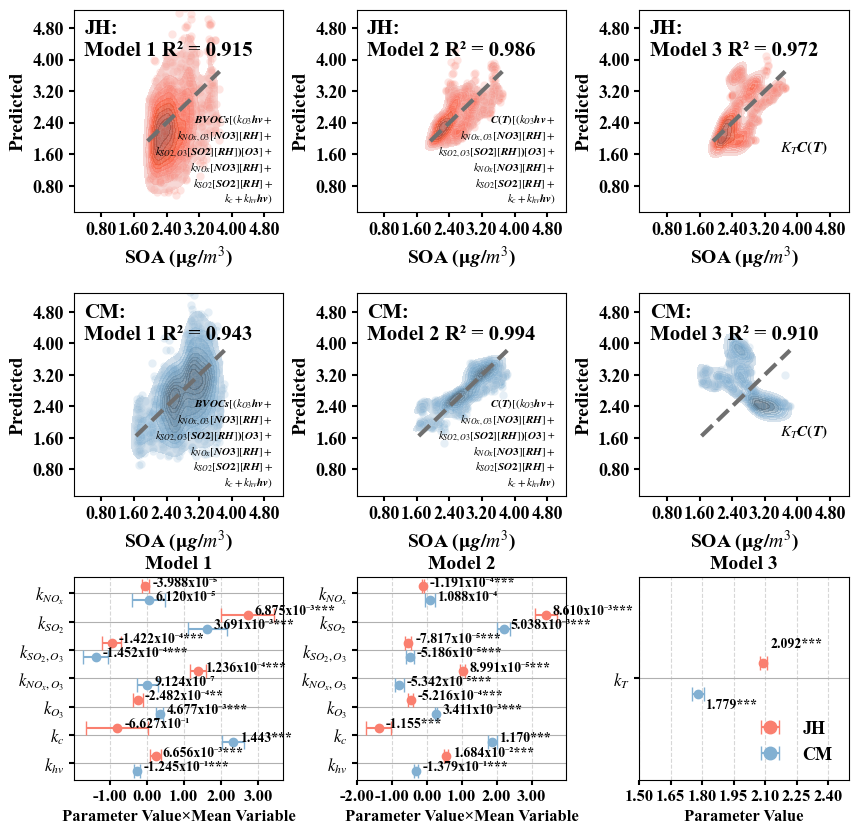

In [10]:
modeljh=[modeljh1, modeljh2, modeljh3]
modelcm=[modelcm1, modelcm2, modelcm3]
Xjh=[Xjh1,Xjh2,Xjh3]
Xcm=[Xcm1,Xcm2,Xcm3]

# 假设模型已经创建，并获取到预测值
real_values_jh = data_jh.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()["SOA"]
real_values_cm = data_cm.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()["SOA"]
predictions_jh1 = modeljh1.predict()  # 使用modeljh1的预测值
predictions_jh2 = modeljh2.predict()
predictions_jh3 = modeljh3.predict()
predictions_cm1 = modelcm1.predict()
predictions_cm2 = modelcm2.predict()
predictions_cm3 = modelcm3.predict()

# 获取参数和置信区间
params = [
    r"$\boldsymbol{k_{NO_x}}$", 
    r"$\boldsymbol{k_{SO_2}}$", 
    r"$\boldsymbol{k_{SO_2,O_3}}$", 
    r"$\boldsymbol{k_{NO_x,O_3}}$", 
    r"$\boldsymbol{k_{O_3}}$", 
    r"$\boldsymbol{k_c}$", 
    r"$\boldsymbol{k_{hv}}$"
]
params2 = [r"$\boldsymbol{k_T}$"]
 
model_label2 = (
    r"$\boldsymbol{C(T)} [(\boldsymbol{k_{O3}}\boldsymbol{hv} +$" + "\n" +
    r"$\boldsymbol{k_{NOx,O3}}[\boldsymbol{NO3}][\boldsymbol{RH}] +$" + "\n" +
    r"$\boldsymbol{k_{SO2,O3}}[\boldsymbol{SO2}][\boldsymbol{RH}]$)$[\boldsymbol{O3}]$ +" + "\n" +
    r"$\boldsymbol{k_{NOx}}[\boldsymbol{NO3}] [\boldsymbol{RH}] + $" + "\n" +
    r"$\boldsymbol{k_{SO2}}[\boldsymbol{SO2}][\boldsymbol{RH}] +$" + "\n" +
    r"$\boldsymbol{k_c} + \boldsymbol{k_{hv}}\boldsymbol{hv})$"
)

model_label1 = (
    r"$\boldsymbol{BVOCs} [(\boldsymbol{k_{O3}}\boldsymbol{hv} +$" + "\n" +
    r"$\boldsymbol{k_{NOx,O3}}[\boldsymbol{NO3}][\boldsymbol{RH}] +$" + "\n" +
    r"$\boldsymbol{k_{SO2,O3}}[\boldsymbol{SO2}][\boldsymbol{RH}]$)$[\boldsymbol{O3}]$ +" + "\n" +
    r"$\boldsymbol{k_{NOx}}[\boldsymbol{NO3}] [\boldsymbol{RH}] + $" + "\n" +
    r"$\boldsymbol{k_{SO2}}[\boldsymbol{SO2}][\boldsymbol{RH}] +$" + "\n" +
    r"$\boldsymbol{k_c} + \boldsymbol{k_{hv}}\boldsymbol{hv})$"
)

model_labels = [
    model_label1,
   model_label2,
    r'$\boldsymbol{K_TC(T)}$'
]

mean_values_jh = [modeljh1.params, modeljh2.params, modeljh3.params]  # 每个模型的参数
conf_interval_jh = [modeljh1.conf_int(), modeljh2.conf_int(), modeljh3.conf_int()]  # 每个模型的置信区间
mean_values_cm = [modelcm1.params, modelcm2.params, modelcm3.params]
conf_interval_cm = [modelcm1.conf_int(), modelcm2.conf_int(), modelcm3.conf_int()]

# 初始化3x3的子图
fig, axes = plt.subplots(3, 3, figsize=(10, 10), gridspec_kw={'hspace': 0.4, 'wspace': 0.35})

# 第一行和第二行：JH和CM地点的模型预测值和真实值的散点图
for i, (predictions_jh, predictions_cm) in enumerate(zip([predictions_jh1, predictions_jh2, predictions_jh3], 
                                                         [predictions_cm1, predictions_cm2, predictions_cm3])):
    ax_jh = axes[0, i]
    ax_cm = axes[1, i]

    # 绘制JH的散点图和联合概率密度
    sns.scatterplot(x=real_values_jh, y=predictions_jh, ax=ax_jh, color='#FA7F6F', alpha=0.2)
    sns.kdeplot(x=real_values_jh, y=predictions_jh, ax=ax_jh, color="#FA7F6F", fill=True, alpha=0.5)
    ax_jh.plot([real_values_jh.min(), real_values_jh.max()], [real_values_jh.min(), real_values_jh.max()], '--', color='#6F6F6F',linewidth=3)
    ax_jh.text(0.05, 0.95, f'JH:\nModel {i+1} R² = {modeljh[i].rsquared:.3f}', transform=ax_jh.transAxes, fontsize=15, color='black', fontweight='bold', verticalalignment='top')
    ax_jh.set_xlabel(r'SOA ($\boldsymbol{μg/m^3}$)', fontweight='bold', fontsize=14)
    ax_jh.set_ylabel('Predicted', fontweight='bold', fontsize=14)

    # 绘制CM的散点图和联合概率密度
    sns.scatterplot(x=real_values_cm, y=predictions_cm, ax=ax_cm, color='#82B0D2', alpha=0.2)
    sns.kdeplot(x=real_values_cm, y=predictions_cm, ax=ax_cm, color="#82B0D2", fill=True, alpha=0.5)
    ax_cm.plot([real_values_cm.min(), real_values_cm.max()], [real_values_cm.min(), real_values_cm.max()], '--', color='#6F6F6F',linewidth=3)
    ax_cm.text(0.05, 0.95, f'CM:\nModel {i+1} R² = {modelcm[i].rsquared:.3f}', transform=ax_cm.transAxes, fontsize=15, color='black', fontweight='bold', verticalalignment='top')
    ax_cm.set_xlabel(r'SOA ($\boldsymbol{μg/m^3}$)', fontweight='bold', fontsize=14)
    ax_cm.set_ylabel('Predicted', fontweight='bold', fontsize=14)
    
    if i!=2:
        ax_jh.text(0.95, 0.05, model_labels[i], transform=ax_jh.transAxes, fontsize=8, ha='right', color='black', fontweight='bold')
        ax_cm.text(0.95, 0.05, model_labels[i], transform=ax_cm.transAxes, fontsize=8, ha='right', color='black', fontweight='bold')
    else:
        ax_jh.text(0.9, 0.3, model_labels[i], transform=ax_jh.transAxes, fontsize=11, ha='right', color='black', fontweight='bold')
        ax_cm.text(0.9, 0.3, model_labels[i], transform=ax_cm.transAxes, fontsize=11, ha='right', color='black', fontweight='bold')
    
    means=np.mean(dataall.SOA)
    stds=np.std(dataall.SOA)
    
    for axp in [ax_jh, ax_cm]:
        axp.set_xlim(means-2*stds,means+2*stds)
        axp.set_ylim(means-2*stds,means+2*stds)
        axp.tick_params(axis='both', which='major', labelsize=13, width=1.5)
        axp.xaxis.set_major_locator(plt.MaxNLocator(7))
        axp.yaxis.set_major_locator(plt.MaxNLocator(7))
        axp.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
        axp.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))
        
        for label in axp.get_xticklabels() + axp.get_yticklabels():
            label.set_fontweight('bold')
        


# 第三行：模型参数的均值和置信区间图，设置归一化
for i in range(3):
    ax = axes[2, i]

    if i < 2:
        # 获取 JH 和 CM 地点 X 的均值和标准差用于归一化
        mean_jh = Xjh[i].mean()
        std_jh = Xjh[i].std()
        mean_cm = Xcm[i].mean()
        std_cm = Xcm[i].std()

        # JH 和 CM 参数的错开 y 位置
        for idx, (mean_val, (lower, upper), pval) in enumerate(zip(mean_values_jh[i], conf_interval_jh[i].values, modeljh[i].pvalues)):
            # 使用均值和标准差进行归一化
            normalized_mean_val = (mean_val - 0) * mean_jh[idx]
            normalized_lower = (lower - 0) * mean_jh[idx]
            normalized_upper = (upper - 0) * mean_jh[idx]
            ax.errorbar(normalized_mean_val, len(params) - idx - 1 + 0.25, 
                        xerr=[[normalized_mean_val - normalized_lower], [normalized_upper - normalized_mean_val]], 
                        fmt='o', color='#FA7F6F', capsize=5)
            
            significance = "***" if pval < 0.001 else ("**" if pval < 0.01 else ("*" if pval < 0.05 else ""))
             # 标注数值和显著性
            ax.annotate(f"{scientific_notation_with_superscript(mean_val)}{significance}",
                        (normalized_mean_val, len(params) - idx - 1 + 0.25),
                        textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10, fontweight='bold')



        for idx, (mean_val, (lower, upper), pval) in enumerate(zip(mean_values_cm[i], conf_interval_cm[i].values, modelcm[i].pvalues)):
            normalized_mean_val = mean_val * mean_cm[idx]
            significance = "***" if pval < 0.001 else ("**" if pval < 0.01 else ("*" if pval < 0.05 else ""))
            ax.errorbar(normalized_mean_val, len(params) - idx - 1 - 0.25,
                        xerr=[[normalized_mean_val - lower * mean_cm[idx]], [upper * mean_cm[idx] - normalized_mean_val]], 
                        fmt='o', color='#82B0D2', capsize=5)
            # 标注数值和显著性
            ax.annotate(f"{scientific_notation_with_superscript(mean_val)}{significance}",
                        (normalized_mean_val, len(params) - idx - 1 - 0.25),
                        textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10, fontweight='bold')

            

        # 设置 y 轴标签
        ax.set_yticks(range(len(params)))
        ax.set_yticklabels(params[::-1], fontsize=12, weight='bold')
        ax.set_xlabel('Parameter Value×Mean Variable', fontsize=12, fontweight='bold')
    else:
        # 第三个模型仅一个参数，将其置于 y 轴中央
        mean_val_jh = (mean_values_jh[i][0] - 0)  
        lower_jh, upper_jh = (conf_interval_jh[i].iloc[0] - 0)
        mean_val_cm = (mean_values_cm[i][0] - 0)
        lower_cm, upper_cm = (conf_interval_cm[i].iloc[0] - 0) 
        
        
        pval_jh = modeljh[i].pvalues[0]
        significance_jh = "***" if pval_jh < 0.001 else ("**" if pval_jh < 0.01 else ("*" if pval_jh < 0.05 else ""))
        
        pval_cm = modelcm[i].pvalues[0]
        significance_cm = "***" if pval_cm < 0.001 else ("**" if pval_cm < 0.01 else ("*" if pval_cm < 0.05 else ""))

        # JH 和 CM 参数的错开
        ax.errorbar(mean_val_jh, 0.15, xerr=[[mean_val_jh - lower_jh], [upper_jh - mean_val_jh]], fmt='o', color='#FA7F6F', capsize=5,label='JH')
        ax.annotate(f"{scientific_notation_with_superscript(mean_val_jh)}{significance_jh}", (mean_val_jh, 0.3),
                    textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10, fontweight='bold')
        
        ax.errorbar(mean_val_cm, -0.15, xerr=[[mean_val_cm - lower_cm], [upper_cm - mean_val_cm]], fmt='o', color='#82B0D2', capsize=5,label='CM')
        ax.annotate(f"{scientific_notation_with_superscript(mean_val_cm)}{significance_cm}", (mean_val_cm, -0.3),
                    textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10, fontweight='bold')
        
        ax.set_yticks([0])
        ax.set_yticklabels(params2, fontsize=12, weight='bold')
        ax.set_xlabel('Parameter Value', fontsize=12, fontweight='bold')
        means=np.mean(dataall.SOA)
        stds=np.std(dataall.SOA)
        ax.set_xlim(1.5,2.5)
        ax.set_ylim(-1,1)
        ax.legend(loc="lower right", frameon=False, markerscale=1.5, prop={'size': 13, 'weight': 'bold'})
        


    # 其他设置
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
    ax.set_title(f'Model {i+1}', fontweight='bold', fontsize=14)
    ax.grid(linestyle='--', alpha=0.5, axis='x')
    ax.grid(linestyle='-', alpha=1, axis='y')
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    
# 调整布局和美观
plt.savefig('BVOCs拟合SOA.svg', format='svg', bbox_inches='tight')
plt.show()